In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Preprocess the data
x_train = preprocess_input(x_train)
x_test = preprocess_input(x_test)



170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 1010s 6us/step


In [2]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

# Load the MobileNetV2 model with pre-trained weights
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Add custom layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(10, activation='softmax')(x)

# Define the full model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])


C:\Users\PMLS\AppData\Local\Temp\ipykernel_16872\789113397.py:7: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(32, 32, 3))


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 26s 3us/step


In [3]:
# Train the model and collect the training history
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

# Unfreeze some layers and fine-tune
for layer in base_model.layers[:100]:
    layer.trainable = True

# Re-compile the model with a lower learning rate
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Continue training the model and collect the training history
history_fine = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 146s 89ms/step - accuracy: 0.2630 - loss: 2.0154 - val_accuracy: 0.2985 - val_loss: 1.9095
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 134s 86ms/step - accuracy: 0.3133 - loss: 1.8775 - val_accuracy: 0.3045 - val_loss: 1.8934
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 133s 85ms/step - accuracy: 0.3306 - loss: 1.8262 - val_accuracy: 0.3080 - val_loss: 1.8962
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 71s 45ms/step - accuracy: 0.3478 - loss: 1.7827 - val_accuracy: 0.3096 - val_loss: 1.8985
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 61s 39ms/step - accuracy: 0.3622 - loss: 1.7380 - val_accuracy: 0.3061 - val_loss: 1.9088
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 60s 39ms/step - accuracy: 0.3795 - loss: 1.6930 - val_accuracy: 0.3056 - val_loss: 1.9276
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 64s 41ms/step - accuracy: 0.3973 - loss: 1.6532 - val_accuracy: 0.3116 - val_loss: 1.9478
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 62s 40ms/step - accuracy: 0.406

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 310s 184ms/step - accuracy: 0.2917 - loss: 61.4132 - val_accuracy: 0.2241 - val_loss: 12.6743
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 197s 126ms/step - accuracy: 0.5199 - loss: 15.3490 - val_accuracy: 0.3512 - val_loss: 5.2383
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 199s 127ms/step - accuracy: 0.5525 - loss: 7.7069 - val_accuracy: 0.4931 - val_loss: 4.6268
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 202s 129ms/step - accuracy: 0.5598 - loss: 4.3601 - val_accuracy: 0.5570 - val_loss: 3.5630
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 206s 132ms/step - accuracy: 0.5876 - loss: 2.8440 - val_accuracy: 0.6152 - val_loss: 2.3525
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 207s 133ms/step - accuracy: 0.6156 - loss: 1.9599 - val_accuracy: 0.6513 - val_loss: 1.7159
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 209s 134ms/step - accuracy: 0.6470 - loss: 1.5603 - val_accuracy: 0.6790 - val_loss: 1.4800
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 210s 135ms/step -

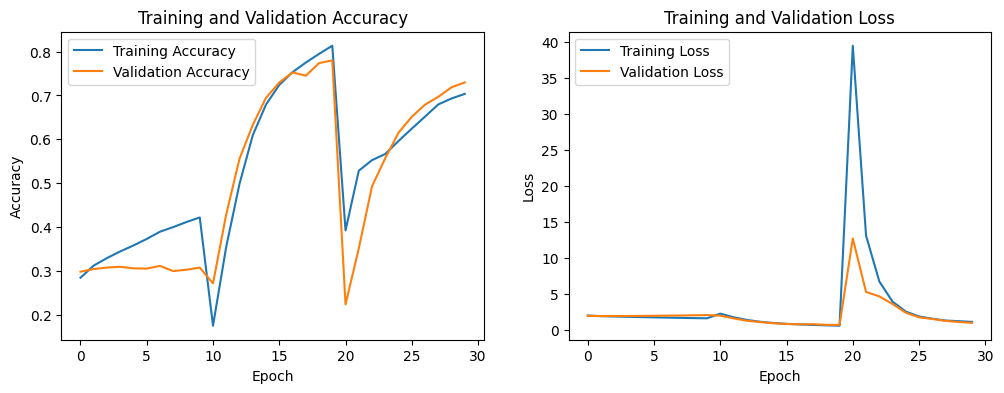

In [4]:
# Further fine-tuning more layers
for layer in base_model.layers[50:]:
    layer.trainable = True

# Re-compile the model with a lower learning rate
model.compile(optimizer=Adam(learning_rate=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

# Continue training the model and collect the training history
history_further_fine = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

# Combine the training histories
combined_history = {
    'accuracy': history.history['accuracy'] + history_fine.history['accuracy'] + history_further_fine.history['accuracy'],
    'val_accuracy': history.history['val_accuracy'] + history_fine.history['val_accuracy'] + history_further_fine.history['val_accuracy'],
    'loss': history.history['loss'] + history_fine.history['loss'] + history_further_fine.history['loss'],
    'val_loss': history.history['val_loss'] + history_fine.history['val_loss'] + history_further_fine.history['val_loss']
}

# Plot accuracy and loss
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(combined_history['accuracy'], label='Training Accuracy')
plt.plot(combined_history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(combined_history['loss'], label='Training Loss')
plt.plot(combined_history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [5]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Define early stopping and learning rate reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-7)

# Further fine-tuning more layers
for layer in base_model.layers[50:]:
    layer.trainable = True

# Re-compile the model with a lower learning rate
model.compile(optimizer=Adam(learning_rate=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

# Continue training the model with callbacks
history_further_fine = model.fit(
    x_train, y_train,
    epochs=30,  # Increase the number of epochs to see if the model improves further
    batch_size=32,
    validation_data=(x_test, y_test),
    callbacks=[early_stopping, reduce_lr]
)


Epoch 1/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 214s 122ms/step - accuracy: 0.7139 - loss: 0.9717 - val_accuracy: 0.7382 - val_loss: 0.8687 - learning_rate: 1.0000e-05
Epoch 2/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 208s 133ms/step - accuracy: 0.7215 - loss: 0.8959 - val_accuracy: 0.7427 - val_loss: 0.8003 - learning_rate: 1.0000e-05
Epoch 3/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 210s 135ms/step - accuracy: 0.7366 - loss: 0.8224 - val_accuracy: 0.7533 - val_loss: 0.7631 - learning_rate: 1.0000e-05
Epoch 4/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 218s 139ms/step - accuracy: 0.7417 - loss: 0.7930 - val_accuracy: 0.7541 - val_loss: 0.7495 - learning_rate: 1.0000e-05
Epoch 5/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 205s 131ms/step - accuracy: 0.7471 - loss: 0.7752 - val_accuracy: 0.7644 - val_loss: 0.7271 - learning_rate: 1.0000e-05
Epoch 6/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 191s 122ms/step - accuracy: 0.7554 - loss: 0.7298 - val_accuracy: 0.7609 - val_loss: 0.7245 - learning_rate: 1.0000e-05
Epoch 7/30
1563/1563 ━━━━━━━

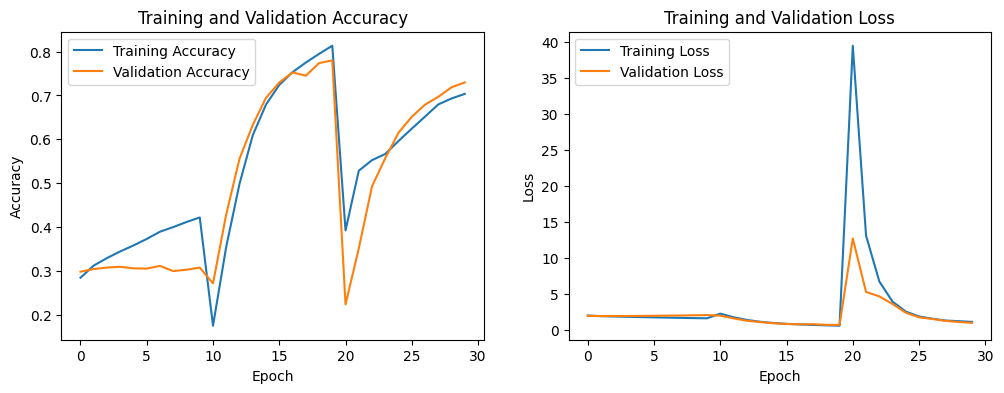

In [8]:
# Plot accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(combined_history['accuracy'], label='Training Accuracy')
plt.plot(combined_history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(combined_history['loss'], label='Training Loss')
plt.plot(combined_history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [9]:
# After training and fine-tuning your model
model.save('cifar10_mobilenetv2.h5')


In [12]:
# Save the trained model in the Keras format
model.save('cifar10_mobilenetv2.keras')


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Predicted class: ship


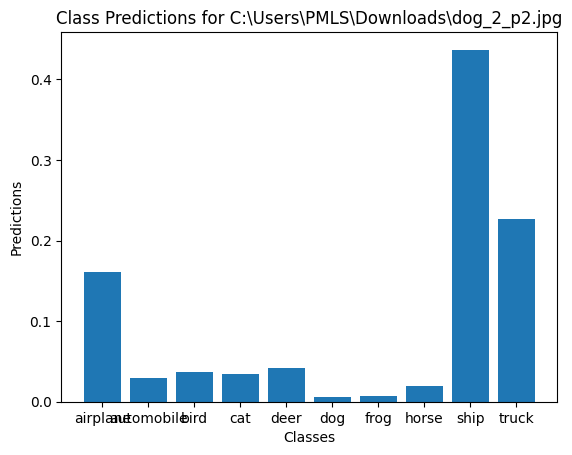

In [29]:
from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Load the model
model_path = './cifar10_mobilenetv2.keras'  # Model is in the same directory as the Jupyter notebook
model = load_model(model_path)

# CIFAR-10 classes
cifar10_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Function to process and classify an image
def classify_image(img_path):
    img = image.load_img(img_path, target_size=(32, 32))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Normalize the image

    predictions = model.predict(img_array)
    predicted_class = cifar10_classes[np.argmax(predictions)]
    return predictions[0], predicted_class

# Example usage
def display_classification(img_path):
    predictions, predicted_class = classify_image(img_path)
    print(f'Predicted class: {predicted_class}')
    plt.bar(cifar10_classes, predictions)
    plt.xlabel('Classes')
    plt.ylabel('Predictions')
    plt.title(f'Class Predictions for {img_path}')
    plt.show()

# Replace 'example_image.jpg' with the path to the image you want to classify
display_classification(r'C:\Users\PMLS\Downloads\dog_2_p2.jpg')


In [30]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model

# Load the model
model_path = './cifar10_mobilenetv2.keras'  # Model is in the same directory as the Jupyter notebook
model = load_model(model_path)

# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Preprocess the data
x_test = x_test.astype('float32') / 255.0
y_test = to_categorical(y_test, 10)

# Evaluate the model on the test data
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)

print(f'Test accuracy: {accuracy:.4f}')


Test accuracy: 0.6510


In [31]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.models import load_model
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Preprocess the data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
)
datagen.fit(x_train)

# Load the existing model
model_path = './cifar10_mobilenetv2.keras'  # Model is in the same directory as the Jupyter notebook
model = load_model(model_path)

# Compile the model
model.compile(optimizer=optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Callbacks
lr_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                 patience=3, 
                                 verbose=1, 
                                 factor=0.5, 
                                 min_lr=0.00001)

early_stopping = EarlyStopping(monitor='val_accuracy', 
                               patience=5, 
                               verbose=1, 
                               restore_best_weights=True)

# Initial training
history = model.fit(datagen.flow(x_train, y_train, batch_size=64),
                    validation_data=(x_test, y_test),
                    epochs=20,  # Initial training for up to 20 epochs
                    callbacks=[lr_reduction, early_stopping])

# Fine-tuning the model
base_model.trainable = True
model.compile(optimizer=optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Continue training (fine-tuning)
history_fine = model.fit(datagen.flow(x_train, y_train, batch_size=64),
                         validation_data=(x_test, y_test),
                         epochs=10,  # Fine-tuning for up to 10 more epochs
                         callbacks=[lr_reduction, early_stopping])

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f'Improved test accuracy: {accuracy:.4f}')


Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 229s 243ms/step - accuracy: 0.4210 - loss: 1.9454 - val_accuracy: 0.1296 - val_loss: 9.9994 - learning_rate: 0.0010
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 157s 201ms/step - accuracy: 0.5035 - loss: 1.4213 - val_accuracy: 0.4511 - val_loss: 2.3893 - learning_rate: 0.0010
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 165s 211ms/step - accuracy: 0.5979 - loss: 1.1689 - val_accuracy: 0.4076 - val_loss: 2.8377 - learning_rate: 0.0010
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 172s 220ms/step - accuracy: 0.6117 - loss: 1.1371 - val_accuracy: 0.3823 - val_loss: 2.6930 - learning_rate: 0.0010
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step - accuracy: 0.5844 - loss: 1.2108
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
782/782 ━━━━━━━━━━━━━━━━━━━━ 175s 223ms/step - accuracy: 0.5844 - loss: 1.2108 - val_accuracy: 0.2917 - val_loss: 2.5448 - learning_rate: 0.0010
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 178s 227ms/step - accuracy:

In [32]:
model.save('cifar10_mobilenetv2.keras')

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 967ms/step
Predicted class: airplane


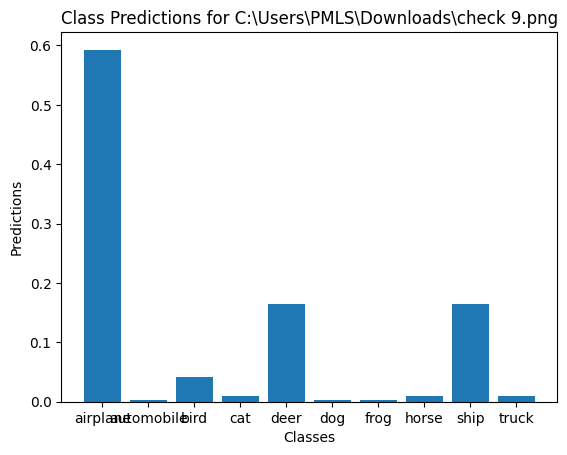

In [6]:
from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Load the model
model_path = './cifar10_mobilenetv2.keras'  # Model is in the same directory as the Jupyter notebook
model = load_model(model_path)

# CIFAR-10 classes
cifar10_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Function to process and classify an image
def classify_image(img_path):
    img = image.load_img(img_path, target_size=(32, 32))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Normalize the image

    predictions = model.predict(img_array)
    predicted_class = cifar10_classes[np.argmax(predictions)]
    return predictions[0], predicted_class

# Example usage
def display_classification(img_path):
    predictions, predicted_class = classify_image(img_path)
    print(f'Predicted class: {predicted_class}')
    plt.bar(cifar10_classes, predictions)
    plt.xlabel('Classes')
    plt.ylabel('Predictions')
    plt.title(f'Class Predictions for {img_path}')
    plt.show()

# Replace 'example_image.jpg' with the path to the image you want to classify
display_classification(r'C:\Users\PMLS\Downloads\check 9.png')